### Imports

In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

### Reading data

In [2]:
data_path = "../data/lab_2/car_crashes.xlsx"

In [15]:
df = pd.read_excel(data_path)
df

ID    Source    TMC  Severity           Start_Time  \
0        A-1  MapQuest  201.0         3  2016-02-08 05:46:00   
1        A-2  MapQuest  201.0         2  2016-02-08 06:07:59   
2        A-3  MapQuest  201.0         2  2016-02-08 06:49:27   
3        A-4  MapQuest  201.0         3  2016-02-08 07:23:34   
4        A-5  MapQuest  201.0         2  2016-02-08 07:39:07   
...      ...       ...    ...       ...                  ...   
4995  A-4996  MapQuest  201.0         2  2016-08-01 11:35:41   
4996  A-4997  MapQuest  201.0         2  2016-08-01 11:41:23   
4997  A-4998  MapQuest  201.0         2  2016-08-01 11:57:27   
4998  A-4999  MapQuest  201.0         2  2016-08-01 12:00:54   
4999  A-5000  MapQuest  201.0         2  2016-08-01 11:59:44   

                 End_Time  Distance(mi)  \
0     2016-02-08 11:00:00          0.01   
1     2016-02-08 06:37:59          0.01   
2     2016-02-08 07:19:27          0.01   
3     2016-02-08 07:53:34          0.01   
4     2016-02-08 08:09:07          0.01   
...                   ...           ...   
4995  2016-08-01 12:05:41          0.00   
4996  2016-08-01 12:26:23          0.00   
4997  2016-08-01 12:42:27          0.00   
4998  2016-08-01 12:30:54          0.00   
4999  2016-08-01 12:29:44          0.00   

                                            Description  \
0     Right lane blocked due to accident on I-70 Eas...   
1     Accident on Brice Rd at Tussing Rd. Expect del...   
2     Accident on OH-32 State Route 32 Westbound at ...   
3     Accident on I-75 Southbound at Exits 52 52B US...   
4     Accident on McEwen Rd at OH-725 Miamisburg Cen...   
...                                                 ...   
4995      Accident on Cold Springs Rd at Middletown Rd.   
4996             Accident on Travis Blvd at Holiday Ln.   
4997                Accident on River Rd at Orchard Rd.   
4998                Accident on Marconi Ave at Bell St.   
4999         Accident on Madison Ave Westbound at I-80.   

                         Street Side  ... No_Exit Railway Roundabout Station  \
0                        I-70 E    R  ...   False   False      False   False   
1                      Brice Rd    L  ...   False   False      False   False   
2                State Route 32    R  ...   False   False      False   False   
3                        I-75 S    R  ...   False   False      False   False   
4     Miamisburg Centerville Rd    R  ...   False   False      False   False   
...                         ...  ...  ...     ...     ...        ...     ...   
4995            Cold Springs Rd    R  ...   False   False      False   False   
4996                Travis Blvd    R  ...   False   False      False   False   
4997                   River Rd    L  ...   False   False      False   False   
4998                    Bell St    R  ...   False   False      False   False   
4999                     I-80 W    R  ...   False   False      False   False   

       Stop  Traffic_Calming  Traffic_Signal  Turning_Loop  Sunrise_Sunset  \
0     False            False           False         False           Night   
1     False            False           False         False           Night   
2     False            False            True         False           Night   
3     False            False           False         False           Night   
4     False            False            True         False             Day   
...     ...              ...             ...           ...             ...   
4995  False            False           False         False             Day   
4996  False            False            True         False             Day   
4997  False            False           False         False             Day   
4998  False            False           False         False             Day   
4999  False            False           False         False             Day   

     Civil_Twilight  
0             Night  
1             Night  
2             Night  
3               Day  
4      

In [4]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Distance(mi)', 'Description', 'Street', 'Side', 'City', 'State',
       'Zipcode', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Bump',
       'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout',
       'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight'],
      dtype='object')

In [30]:
df = df.loc[:,["Severity", "Visibility(mi)", "Wind_Speed(mph)",
               "Humidity(%)", "Temperature(F)"]].dropna().copy()
df.describe()

Severity  Visibility(mi)  Wind_Speed(mph)  Humidity(%)  \
count  4519.000000     4519.000000      4519.000000  4519.000000   
mean      2.422439        9.469772         9.410246    51.027661   
std       0.497574        1.850890         4.314188    23.749484   
min       1.000000        0.200000         1.200000     8.000000   
25%       2.000000       10.000000         5.800000    32.000000   
50%       2.000000       10.000000         9.200000    50.000000   
75%       3.000000       10.000000        11.500000    69.000000   
max       4.000000       30.000000        31.100000   100.000000   

       Temperature(F)  
count     4519.000000  
mean        70.287586  
std         18.501633  
min          5.000000  
25%         61.000000  
50%         71.600000  
75%         82.900000  
max        106.000000

### Functions

In [98]:
def momentum(arr, k: int):
    if k < 1:
        raise ValueError("K must be natural")
    sum = 0
    for elem in arr:
        sum += elem ** k
    return sum / len(arr)

def mean_1d(arr):
    return momentum(arr, 1)

def mean_2d(arr_2d):
    res = []
    for arr_1d in arr_2d:
        res.append(mean_1d(arr_1d))
    return res

def cov(arr1, arr2):
    if len(arr1) != len(arr2):
        raise ValueError("Array lenghts must be same")
    mean1 = mean_1d(arr1)
    mean2 = mean_1d(arr2)
    sum = 0
    for i in range(len(arr1)):
        sum += (arr1[i] - mean1) * (arr2[i] - mean2)
    return sum / len(arr1)

def cov_matrix(arrs):
    result = np.zeros((arrs.shape[0], arrs.shape[0]))
    for i in range(arrs.shape[0]):
        for j in range(arrs.shape[0]):
            result[i, j] = cov(arrs[i], arrs[j])
    return result

def variance(arr):
    return momentum(arr, 2) - mean_1d(arr) ** 2

def corr(arr1, arr2):
    return cov(arr1, arr2) / (variance(arr1) * variance(arr2)) ** 0.5

def corr_matrix(arrs):
    result = np.zeros((arrs.shape[0], arrs.shape[0]))
    for i in range(arrs.shape[0]):
        for j in range(arrs.shape[0]):
            result[i, j] = corr(arrs[i], arrs[j])
    return result

### Comparison

In [99]:
res1 = np.mean(df)
res2 = mean_2d(df.values.T)
print(f"Theirs: {res1}")
print(f"Ours {res2}")
np.allclose(res1, res2, atol=0.0001)

Theirs: Severity            2.422439
Visibility(mi)      9.469772
Wind_Speed(mph)     9.410246
Humidity(%)        51.027661
Temperature(F)     70.287586
dtype: float64
Ours [2.422438592608984, 9.469772073467581, 9.410245629564091, 51.027660986944014, 70.28758574905973]


True

In [100]:
res1 = np.cov(df["Severity"].values, df["Visibility(mi)"].values)[0][1]
res2 = cov(df["Severity"].values, df["Visibility(mi)"].values)
print(f"Theirs: {res1}")
print(f"Ours {res2}")
np.allclose(res1, res2, atol=0.0001)

Theirs: 0.03829241074599107
Ours 0.038283937098997294


True

In [101]:
res1 = np.cov(df.T)
res2 = cov_matrix(df.values.T)
print(f"Theirs: {res1}")
print(f"Ours {res2}")
np.allclose(res1, res2, atol=0.12)

Theirs: [[ 2.47579621e-01  3.82924107e-02  1.79756771e-01  4.48914382e-01
  -1.04471269e-01]
 [ 3.82924107e-02  3.42579258e+00  4.35475775e-01 -1.78702792e+01
   1.56500651e+01]
 [ 1.79756771e-01  4.35475775e-01  1.86122213e+01 -3.45145655e+00
  -1.40489713e+00]
 [ 4.48914382e-01 -1.78702792e+01 -3.45145655e+00  5.64037969e+02
  -3.71785181e+02]
 [-1.04471269e-01  1.56500651e+01 -1.40489713e+00 -3.71785181e+02
   3.42310441e+02]]
Ours [[ 2.47524834e-01  3.82839371e-02  1.79716993e-01  4.48815042e-01
  -1.04448151e-01]
 [ 3.82839371e-02  3.42503449e+00  4.35379410e-01 -1.78663247e+01
   1.56466020e+01]
 [ 1.79716993e-01  4.35379410e-01  1.86081026e+01 -3.45069279e+00
  -1.40458624e+00]
 [ 4.48815042e-01 -1.78663247e+01 -3.45069279e+00  5.63913154e+02
  -3.71702910e+02]
 [-1.04448151e-01  1.56466020e+01 -1.40458624e+00 -3.71702910e+02
   3.42234692e+02]]


True

In [102]:
res1 = np.corrcoef(df.T)
res2 = corr_matrix(df.values.T)
print(f"Theirs: {res1}")
print(f"Ours {res2}")
np.allclose(res1, res2, atol=0.0001)

Theirs: [[ 1.          0.04157907  0.08373918  0.03798848 -0.01134826]
 [ 0.04157907  1.          0.05453614 -0.40653378  0.45700983]
 [ 0.08373918  0.05453614  1.         -0.03368598 -0.01760092]
 [ 0.03798848 -0.40653378 -0.03368598  1.         -0.84611196]
 [-0.01134826  0.45700983 -0.01760092 -0.84611196  1.        ]]
Ours [[ 1.          0.04157907  0.08373918  0.03798848 -0.01134826]
 [ 0.04157907  1.          0.05453614 -0.40653378  0.45700983]
 [ 0.08373918  0.05453614  1.         -0.03368598 -0.01760092]
 [ 0.03798848 -0.40653378 -0.03368598  1.         -0.84611196]
 [-0.01134826  0.45700983 -0.01760092 -0.84611196  1.        ]]


True

### Graphs

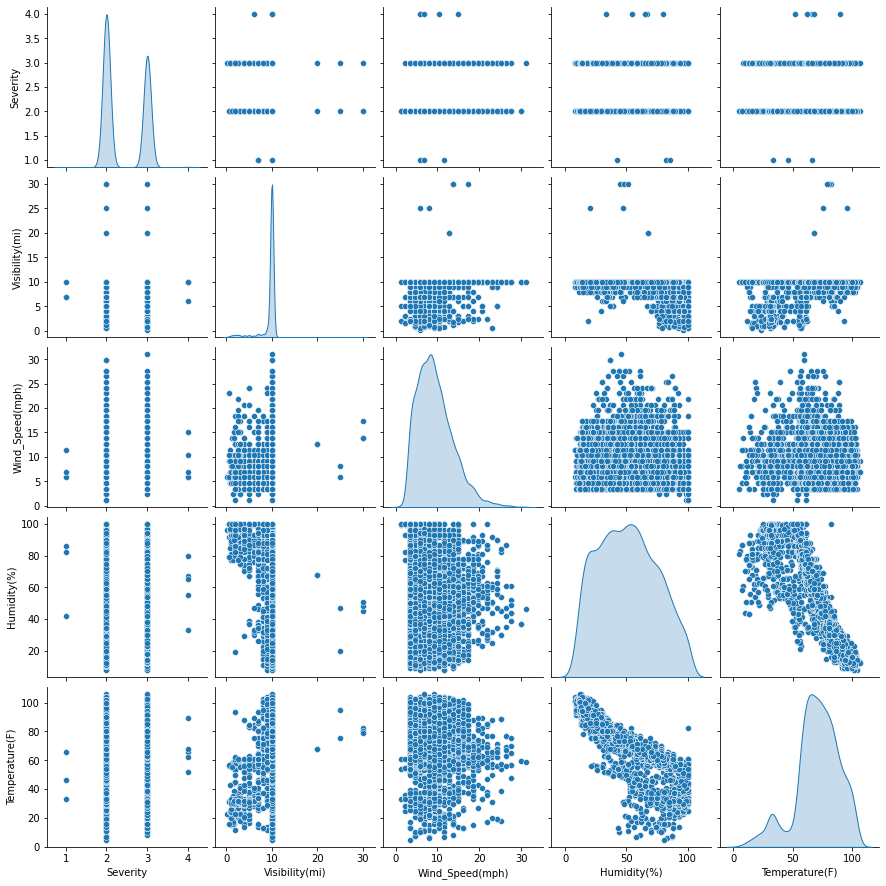

In [116]:
sns.pairplot(df, diag_kind="kde")

##### По графикам видно, что практически все аварии произошли при небольшой видимости (<10 миль), влажность имеет обратную зависимость от температуры, есть небольшая прямая зависимость между температурой и скоростью ветра

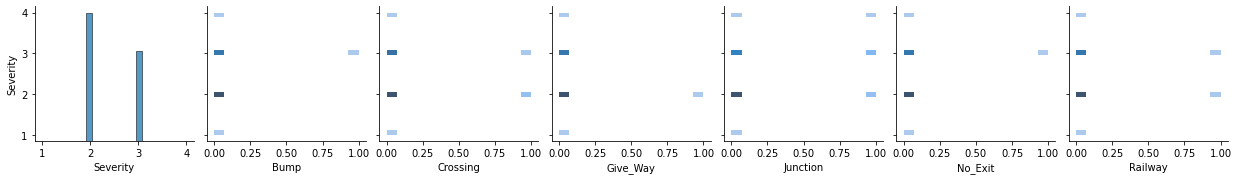

In [141]:
new_df = pd.read_excel(data_path).loc[:,["Severity", "Bump", "Crossing",
                                         "Give_Way", "Junction",
                                         "No_Exit", "Railway"]] \
                                 .astype(int).dropna().copy()
sns.pairplot(new_df, y_vars=["Severity"], kind="hist")

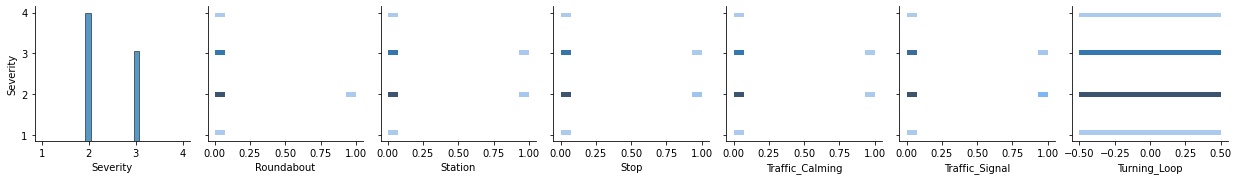

In [142]:
new_df = pd.read_excel(data_path).loc[:,["Severity", "Roundabout", "Station",
                                         "Stop", "Traffic_Calming",
                                         "Traffic_Signal", "Turning_Loop"]] \
                                 .astype(int).dropna().copy()
sns.pairplot(new_df, y_vars=["Severity"], kind="hist")

##### Лежачие полицейские и знаки "тупик" не сильно помогают в уменьшении серьезности аварий. В местах, где расположены знаки "Уступи дорогу" и на круговых перекрёстках серьезность аварий не очень высокая. Самые серьезные аварии происходят на транспортных развязках